In [11]:
from pca_functions import *

In [12]:
df_90 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_90s_1s_ketone.csv')
#df_45= pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_45s_45s_ketone.csv')
df_30 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_30s_30s_ketone.csv')


df_all = pd.concat([df_90, df_30], ignore_index=True)

In [13]:
df_90_elevated_platform=df_90[df_90['trial'] == 11]
#display(df_90)
df_90_elevated_platform['unsafe_time_spent'] = df_90_elevated_platform['unsafe_time_spent'] + df_90_elevated_platform['outside_time_spent']
df_90_pca = df_90_elevated_platform.drop(columns=['participant_id','edge_dist','drink', 'session','trial', 'version', 'segment', 'stops_count', 'outside_time_spent'])

#display(df_90_pca.head())

df_90_pca_x_axis= df_90_elevated_platform[['drink','session']]
df_90_pca_x_axis.loc[df_90_pca_x_axis['drink'] == 'placebo', 'drink'] = -0.5
df_90_pca_x_axis.loc[df_90_pca_x_axis['drink'] == 'ketone', 'drink'] = 0.5
scaler=StandardScaler()
df_90_pca_scaled=scaler.fit_transform(df_90_pca)
find_num_components_explaining_90variance(df_90_pca_scaled)

No. of components explaining 80 % of the variance in data: 2
No. of components explaining 85 % of the variance in data: 3
No. of components explaining 90 % of the variance in data: 4
No. of components explaining 95 % of the variance in data: 6
No. of components explaining 99 % of the variance in data: 8


C:\Users\lal\AppData\Local\Temp\ipykernel_14712\2524722874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_90_elevated_platform['unsafe_time_spent'] = df_90_elevated_platform['unsafe_time_spent'] + df_90_elevated_platform['outside_time_spent']


In [14]:
df_90_pca_elevated_platform_df = pd.DataFrame(df_90_pca_scaled, columns=df_90_pca.columns)
reduced_3_data_90=reduce_data(df_90_pca_elevated_platform_df, 3)

Proportion of variance explained by each of the 3 components is: [0.45283139 0.20418283 0.15186487]
Total explained variance by 3 components is: 80.88790856580698


In [15]:
reduced_3_data_90_df = pd.DataFrame(reduced_3_data_90, columns=[f'PC{i+1}' for i in range(reduced_3_data_90.shape[1])])

In [16]:
combined_90_elevated_platform = pd.concat([
    df_90_elevated_platform[['participant_id', 'session', 'drink']].reset_index(drop=True),
    reduced_3_data_90_df[['PC1', 'PC2', 'PC3']].reset_index(drop=True)
], axis=1)

In [17]:
#combined_90_elevated_platform.to_csv('../data/pca/combined_90_elevated_platform_pca.csv', index=False)

In [18]:
component_weight_90_elevated_platform = components_weight(df_90_pca_elevated_platform_df, 3)

In [19]:
component_weight_90_elevated_platform

,center_dist,speed,acceleration,stops_duration,max_distance,area_covered,rmssd,hr,safe_area_coverage,unsafe_area_coverage,safe_time_spent,unsafe_time_spent
PC1,0.350334,0.323422,0.148497,-0.286726,0.351555,0.276689,0.013498,-0.042166,-0.012467,0.395581,-0.393483,0.393478
PC2,-0.237886,0.375942,0.325499,-0.360570,0.182100,-0.227590,-0.065407,0.206945,0.580427,-0.001821,0.220409,-0.220401
PC3,0.054247,0.018750,0.222885,0.122481,-0.240930,0.211668,-0.627034,0.637851,-0.160965,0.047066,-0.022621,0.022667


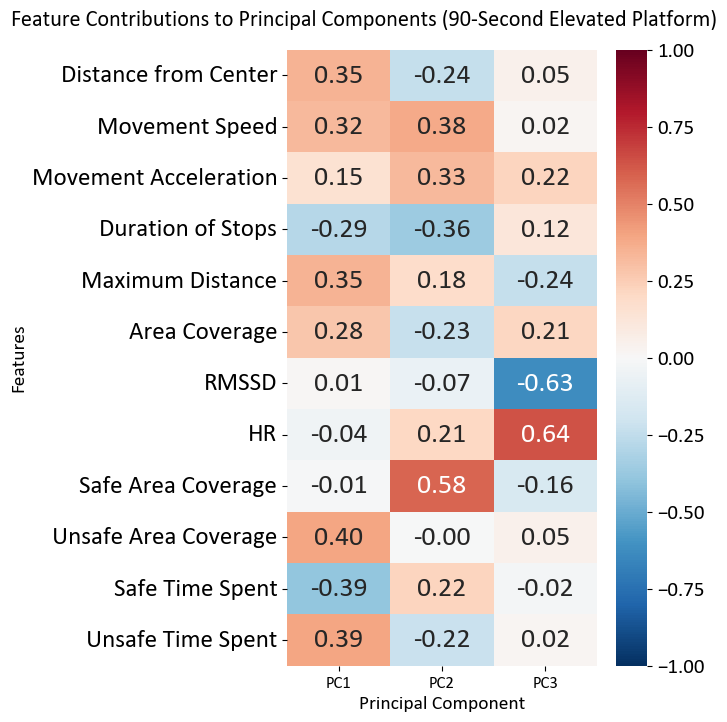

In [20]:
component_weight_90_elevated_platform = component_weight_90_elevated_platform.rename(
    columns={
        'center_dist': 'Distance from Center',
        'speed': 'Movement Speed',
        'acceleration': 'Movement Acceleration',
        'stops_duration': 'Duration of Stops',
        'max_distance': 'Maximum Distance',
        'area_covered': 'Area Coverage',
        'rmssd': 'RMSSD',
        'hr': 'HR',
        'safe_area_coverage': 'Safe Area Coverage',
        'unsafe_area_coverage': 'Unsafe Area Coverage',
        'safe_time_spent': 'Safe Time Spent',
        'unsafe_time_spent': 'Unsafe Time Spent'
    }
)

# Add title now!

fig, ax=display_pc_weights_1(component_weight_90_elevated_platform, is_horizontal=False, save_fig=False)

plt.suptitle("Feature Contributions to Principal Components (90-Second Elevated Platform)", fontsize=16, x=0.28, y=0.93)


plt.show()